# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# keep everything other than mouse ID g989
cleaned_df = combined_df[combined_df['Mouse ID'] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].value_counts()

Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# ================================= fix SEM ====================================

drug_regimen = cleaned_df.groupby(["Drug Regimen"])

mean = drug_regimen["Tumor Volume (mm3)"].mean()
median = drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
std_dev = drug_regimen["Tumor Volume (mm3)"].std()
sem = st.sem(cleaned_df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"])
sem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"mean": mean,
                             "median": median,
                             "var": variance,
                             "std": std_dev,
                             "sem": sem})

summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.205591
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.205591
Infubinol,52.884795,51.820584,43.128684,6.567243,0.205591
Ketapril,55.235638,53.698743,68.553577,8.279709,0.205591
Naftisol,54.331565,52.509285,66.173479,8.134708,0.205591
Placebo,54.033581,52.288934,61.168083,7.821003,0.205591
Propriva,52.320930,50.446266,43.852013,6.622085,0.205591
Ramicane,40.216745,40.673236,23.486704,4.846308,0.205591
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.205591


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

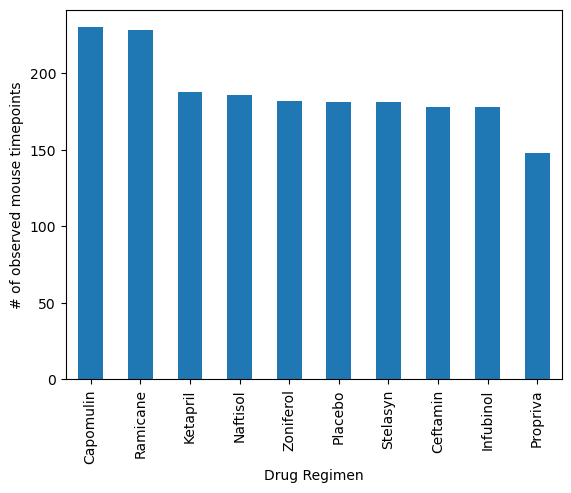

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_plot = cleaned_df.groupby(["Drug Regimen"])["Mouse ID"].count()

pandas_plot.sort_values(ascending=False).plot(kind='bar', ylabel="# of observed mouse timepoints")
plt.show()

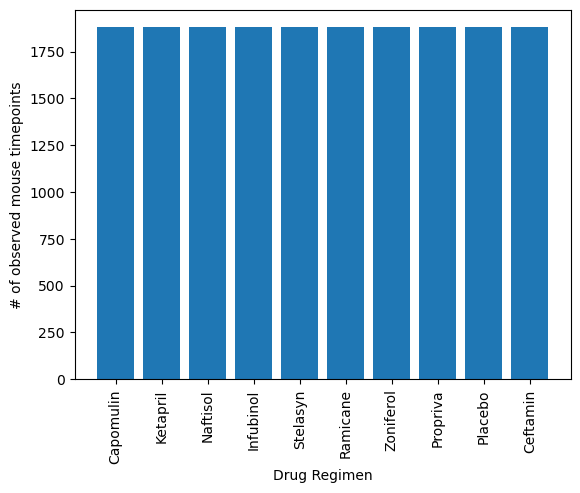

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#==================================== fix Mouse ID (y axis) ============================

plt.bar(cleaned_df["Drug Regimen"], cleaned_df["Mouse ID"].count())
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

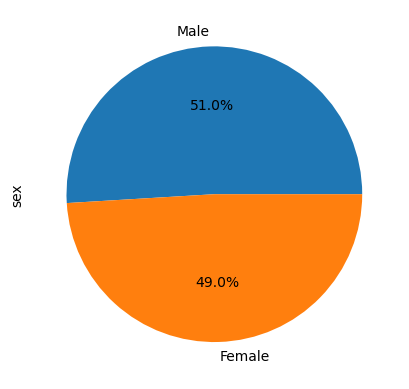

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='sex')
plt.show

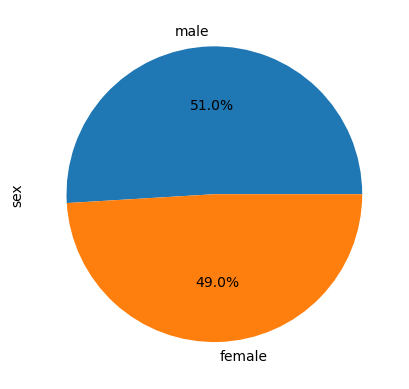

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size = cleaned_df["Sex"].value_counts()
labels = ["male", "female"]
plt.pie(size, labels=labels, autopct= '%1.1f%%')
plt.ylabel("sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_mouse_df = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max() 
greatest_mouse_df = greatest_mouse_df.reset_index()
print(greatest_mouse_df)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned_mouse_df = greatest_mouse_df.merge(cleaned_df, how="left", on=["Mouse ID", "Timepoint"])
cleaned_mouse_df

#test = cleaned_mouse_df.groupby(["Timepoint"]).max()["Tumor Volume (mm3)"]
#test


    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

final_tumor = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


AttributeError: 'Series' object has no attribute 'set_index'

## Line and Scatter Plots

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
if (cleaned_mouse_df["Drug Regimen"] == "Capomulin").any():
    mouse = cleaned_mouse_df["Mouse ID"].sample(12)
    cleaned_mouse_df.loc[cleaned_mouse_df["Mouse ID"] == mouse, :].plot()
    #plt.plot(cleaned_mouse_df["Timepoint"], cleaned_mouse_df["Tumor Volume (mm3)"])
    plt.show()

ValueError: Can only compare identically-labeled Series objects

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
